In [1]:
import numpy as np
import random
import time
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from model import Model
from smt_training import train_smt
from backpropagation_training import train_backpropagation
from testing import test

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

points = []
for i in range(0, 360, 90):
    for j in range(0, 180, 60):
        i_radians = (i * np.pi) / 180.0
        j_radians = (j * np.pi) / 180.0
        x = np.cos(i_radians) *  np.sin(j_radians)
        y = np.sin(i_radians) * np.sin(j_radians)
        z = np.cos(j_radians)
        points.append([x, y, z])
points = torch.FloatTensor(points)
print("points.shape: ", points.shape)

hyperplane1 = [random.uniform(0, 0.001), random.uniform(0, 0.001), random.uniform(0, 0.001)]
print("hyperplane1: ", hyperplane1)

hyperplane2 = [random.uniform(0, 0.001), random.uniform(0, 0.001), random.uniform(0, 0.001)]
print("hyperplane1: ", hyperplane2)

labels = []
for point in points:
    if (point[0] * hyperplane1[0] + point[1] * hyperplane1[1] + point[2] * hyperplane1[2] > 0) and (point[0] * hyperplane2[0] + point[1] * hyperplane2[1] + point[2] * hyperplane2[2] > 0):   
        labels.append(1)
    else:
        labels.append(0)

labels = torch.tensor(labels)

criterion = nn.CrossEntropyLoss()
num_epochs = 100

points.shape:  torch.Size([12, 3])
hyperplane1:  [0.0008694857129801705, 0.0008723120336103639, 0.0003556822603241369]
hyperplane1:  [0.0003554548998917537, 0.0004340116809167839, 0.00035256636652937555]


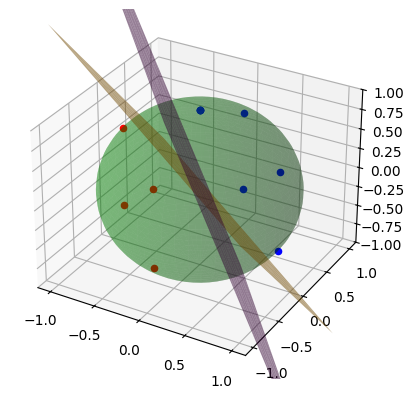

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-1, 1)

plane1_X, plane1_Y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
plane1_Z = (-hyperplane1[0] * plane1_X - hyperplane1[1] * plane1_Y) / hyperplane1[2]

ax.plot_surface(plane1_X, plane1_Y, plane1_Z, color='purple', alpha=0.5)

plane2_X, plane2_Y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
plane2_Z = (-hyperplane2[0] * plane2_X - hyperplane2[1] * plane2_Y) / hyperplane2[2]

ax.plot_surface(plane2_X, plane2_Y, plane2_Z, color='orange', alpha=0.5)

U, V = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
sphere_X = np.cos(U) * np.sin(V)
sphere_Y = np.sin(U) * np.sin(V)
sphere_Z = np.cos(V)

ax.plot_surface(sphere_X, sphere_Y, sphere_Z, color='green', alpha=0.3)

for (index, point) in enumerate(points):
    if labels[index] == 1:
        ax.scatter(point[0], point[1], point[2], color='blue', alpha = 1.0)
    else:
        ax.scatter(point[0], point[1], point[2], color='red', alpha = 1.0)

plt.show()

In [4]:
embedding_sizes = [10, 20, 30, 40, 50, 60, 70, 80]
smt_times = []
backpropagation_times = []

for embedding_size in embedding_sizes:
    
    print("embedding_size: ", embedding_size)

    model = Model(embedding_size)
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
    model.to(device)

    start_time = time.time()
    train_backpropagation(model, points, labels, criterion, optimizer, num_epochs)
    backpropagation_times.append(time.time() - start_time)

    start_time = time.time()
    train_smt(model, points, labels)
    smt_times.append(time.time() - start_time)
    test(model, points, labels, criterion)

embedding_size:  10
epoch: 0, accuracy: 0.5833333134651184, loss: 0.6701110899448395
epoch: 1, accuracy: 0.8333333134651184, loss: 0.545688983052969
epoch: 2, accuracy: 0.8333333134651184, loss: 0.43985696509480476
epoch: 3, accuracy: 0.9166666865348816, loss: 0.34192673365275067
epoch: 4, accuracy: 1.0, loss: 0.2587632990131776
formula.size():  6781
testing accuracy: 1.0 and loss: 0.32952189197142917
embedding_size:  20
epoch: 0, accuracy: 0.5833333134651184, loss: 0.6954359586040179
epoch: 1, accuracy: 0.75, loss: 0.5700564384460449
epoch: 2, accuracy: 0.8333333134651184, loss: 0.46607770149906474
epoch: 3, accuracy: 0.9166666865348816, loss: 0.35970422625541687
epoch: 4, accuracy: 1.0, loss: 0.2625046769777934
formula.size():  13501


/Users/Chase/Documents/CS_517/theory_of_computation_final/env/lib/python3.12/site-packages/pysmt/oracles.py:71: UserWarning: Instance-based walkers (<=0.6.0) walkers are deprecated. You should use new-style/class based walkers
  self.set_function(self.measure_to_fun[measure], *op.ALL_TYPES)


testing accuracy: 1.0 and loss: 0.2821684861553801
embedding_size:  30
epoch: 0, accuracy: 0.75, loss: 0.5901784884432951
epoch: 1, accuracy: 0.8333333134651184, loss: 0.4064726158976555
epoch: 2, accuracy: 1.0, loss: 0.2645953434209029
formula.size():  20221
testing accuracy: 1.0 and loss: 0.47749603788057965
embedding_size:  40
epoch: 0, accuracy: 0.6666666865348816, loss: 0.6437883699933687
epoch: 1, accuracy: 0.8333333134651184, loss: 0.45726170390844345
epoch: 2, accuracy: 0.9166666865348816, loss: 0.3226796767363946
epoch: 3, accuracy: 0.9166666865348816, loss: 0.22703627683222294
epoch: 4, accuracy: 1.0, loss: 0.15975939389318228
formula.size():  26941
testing accuracy: 0.8333333134651184 and loss: 0.4744998862346013
embedding_size:  50
epoch: 0, accuracy: 0.6666666865348816, loss: 0.6004658788442612
epoch: 1, accuracy: 0.75, loss: 0.431040541579326
epoch: 2, accuracy: 0.9166666865348816, loss: 0.28953680706520873
epoch: 3, accuracy: 1.0, loss: 0.19518958559880653
formula.size()

In [5]:
for i in range(len(embedding_sizes)):
    embedding_sizes[i] = 3 * embedding_sizes[i] + 2 * embedding_sizes[i]

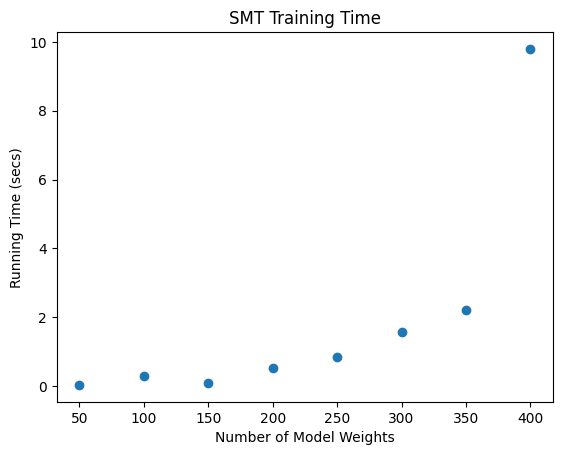

In [6]:
plt.scatter(embedding_sizes, smt_times)
plt.title("SMT Training Time")
plt.xlabel("Number of Model Weights")
plt.ylabel("Running Time (secs)")
plt.show()

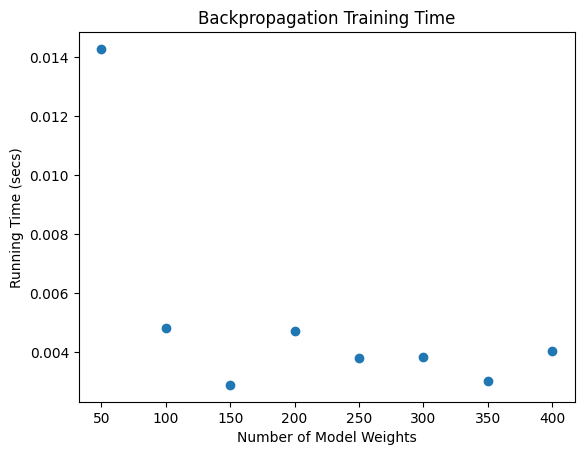

In [7]:
plt.scatter(embedding_sizes, backpropagation_times)
plt.title("Backpropagation Training Time")
plt.xlabel("Number of Model Weights")
plt.ylabel("Running Time (secs)")
plt.show()

In [8]:
embedding_sizes = [100000, 1000000, 10000000, 100000000]
smt_times = []
backpropagation_times = []

for embedding_size in embedding_sizes:
    
    print("embedding_size: ", embedding_size)

    model = Model(embedding_size)
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
    model.to(device)

    start_time = time.time()
    train_backpropagation(model, points, labels, criterion, optimizer, num_epochs)
    backpropagation_times.append(time.time() - start_time)

embedding_size:  100000
epoch: 0, accuracy: 0.6666666865348816, loss: 213.4872092207273
epoch: 1, accuracy: 0.8333333134651184, loss: 50.11578210194906
epoch: 2, accuracy: 0.9166666865348816, loss: 39.79070536295573
epoch: 3, accuracy: 1.0, loss: 0.0
embedding_size:  1000000
epoch: 0, accuracy: 0.6666666865348816, loss: 2158.185545643171
epoch: 1, accuracy: 0.8333333134651184, loss: 486.0047785441081
epoch: 2, accuracy: 0.9166666865348816, loss: 397.8299967447917
epoch: 3, accuracy: 1.0, loss: 0.0
embedding_size:  10000000
epoch: 0, accuracy: 0.6666666865348816, loss: 22464.487266664702
epoch: 1, accuracy: 0.8333333134651184, loss: 3308.7766927083335
epoch: 2, accuracy: 0.9166666865348816, loss: 4749.430989583333
epoch: 3, accuracy: 1.0, loss: 0.0
embedding_size:  100000000
epoch: 0, accuracy: 0.75, loss: 210175.78967886665
epoch: 1, accuracy: 0.8333333134651184, loss: 52026.27734375
epoch: 2, accuracy: 0.9166666865348816, loss: 44996.15625
epoch: 3, accuracy: 1.0, loss: 0.0


In [9]:
for i in range(len(embedding_sizes)):
    embedding_sizes[i] = np.log10(3 * embedding_sizes[i] + 2 * embedding_sizes[i])

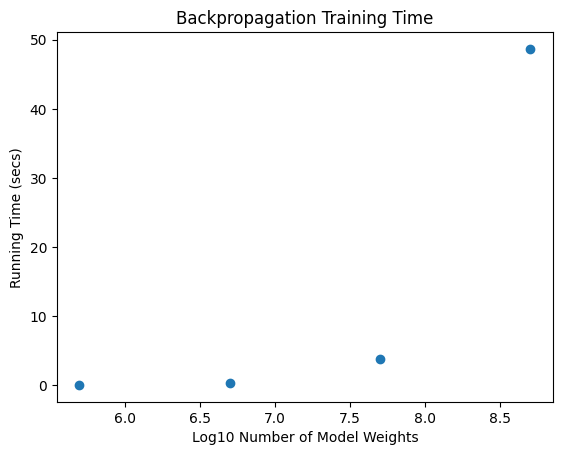

In [10]:
plt.scatter(embedding_sizes, backpropagation_times)
plt.title("Backpropagation Training Time")
plt.xlabel("Log10 Number of Model Weights")
plt.ylabel("Running Time (secs)")
plt.show()